In [48]:
!pip install polars

In [49]:
import pandas as pd
import polars as pl
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score


In [50]:
df = pl.scan_csv('data/Physical_Activity_Monitoring_unlabeled.csv')

In [51]:
df.head(10).collect()

timestamp,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,handGyro1,handGyro2,handGyro3,handMagne1,handMagne2,handMagne3,handOrientation1,handOrientation2,handOrientation3,handOrientation4,chestTemperature,chestAcc16_1,chestAcc16_2,chestAcc16_3,chestAcc6_1,chestAcc6_2,chestAcc6_3,chestGyro1,chestGyro2,chestGyro3,chestMagne1,chestMagne2,chestMagne3,chestOrientation1,chestOrientation2,chestOrientation3,chestOrientation4,ankleTemperature,ankleAcc16_1,ankleAcc16_2,ankleAcc16_3,ankleAcc6_1,ankleAcc6_2,ankleAcc6_3,ankleGyro1,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,ankleOrientation1,ankleOrientation2,ankleOrientation3,ankleOrientation4,subject_id
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i64
252.75,34.875,0.902847,7.45872,6.03249,1.0061,7.44575,6.30365,-0.021952,0.004114,-0.000752,-9.99538,7.2291,-32.1399,0.561813,-0.218644,0.359836,0.712095,36.625,-0.106754,1.66721,9.32797,-0.292054,1.56048,9.74926,-0.019807,-0.034096,0.003963,39.5466,5.5805,-27.966,0.987675,-0.081231,-0.009229,0.133472,34.125,-0.458486,-9.07442,-4.47955,-0.318531,-8.89907,-4.13847,0.0439539,-0.025606,0.0302387,-14.5447,27.3336,-5.7662,0.206416,0.348212,0.763201,-0.503652,5
3652.45,29.75,-4.06933,3.76168,8.27972,-5.9725,3.22273,6.90897,0.116054,-0.375968,-0.01289,40.4558,-1.19692,-37.5552,0.884964,-0.281047,-0.145657,0.341518,34.6875,0.0697556,2.61466,-11.891,-0.139514,2.40386,-10.9686,0.299329,0.272314,0.249314,17.4295,2.61508,39.3298,0.155581,-0.908072,-0.388069,-0.024528,33.625,6.03534,2.78717,-2.05542,6.39719,4.93016,-1.31267,-0.319186,-0.670163,1.7862,-32.8257,-15.7719,-1.31395,0.578332,-0.566734,0.405888,-0.423791,2
504.76,34.375,-2.00754,-9.6018,0.773674,-1.8035,-9.58937,1.07368,0.0201311,0.0421891,-0.011507,7.26741,24.4379,-14.3005,0.535655,0.564385,0.371967,-0.506146,37.625,0.326521,9.81131,0.0163223,0.26123,9.78271,0.460448,0.009436,-0.015007,-0.037835,5.6352,-25.822,-3.77094,0.721119,-0.680477,0.0903025,0.0937211,33.9375,9.23875,2.80925,-2.56296,9.14233,2.91815,-2.12294,0.0656542,-0.009741,-0.006579,-18.8171,16.3089,25.2928,0.139776,0.676586,0.393796,0.606316,8
2801.61,31.9375,-13.2622,5.85443,0.899334,-13.6115,5.91511,0.840377,1.71563,-0.050492,-1.829,46.4822,-7.83916,-13.6242,0.648205,0.540984,-0.28256,-0.455332,36.5,2.12746,8.91873,-8.58292,2.37262,9.7302,-8.65023,0.0781086,-0.099471,0.488145,-1.19466,-38.6897,5.28249,0.367155,-0.663333,0.553109,0.345336,34.5625,13.54,3.08224,2.57328,18.0863,1.82221,2.91851,2.97001,-0.16347,-3.49557,-26.7418,34.3566,21.3274,0.416303,0.783387,0.306464,0.345075,2
441.01,33.5,-0.01394,8.6654,4.39821,0.144153,8.56816,4.8222,-0.006938,-0.007383,-0.032679,3.97764,-22.4232,-20.1775,0.769041,-0.442364,0.232331,0.398638,35.8125,0.648395,9.73894,0.603203,0.519639,9.79662,0.897193,0.003127,-0.015282,-0.06141,4.60037,-25.655,-3.63808,0.735751,-0.666812,0.086031,0.0814302,34.6875,9.55177,-0.494227,-2.77079,9.5455,-0.394571,-2.47767,0.0139526,-0.028172,-0.003737,-17.7798,-3.9981,10.995,0.171133,-0.748343,0.252988,-0.588807,6
2407.75,32.25,-11.2486,4.70549,1.47219,-10.4374,4.45819,1.59536,1.37628,1.62911,-2.77106,35.4523,-33.6593,-20.9605,0.199763,0.512604,-0.394729,-0.735881,36.625,0.672162,10.216,-1.2178,-0.353022,9.33357,-1.16931,0.477854,-0.374119,-0.030835,-5.3361,-39.8521,-12.5099,0.34798,-0.39305,0.601259,0.602419,34.9375,2.86347,-2.59514,-0.742501,3.8439,-1.37686,-0.749085,-2.16663,0.395789,-0.734158,-37.23,-17.6606,25.9766,0.0816376,-0.564666,-0.465628,-0.676519,6
288.18,33.8125,-9.00348,3.48025,2.20273,-8.78106,3.45025,2.42642,0.29149,-0.142762,-0.277982,46.0534,-0.5136,2.54593,0.755744,-0.325815,-0.516071,0.237417,37.1875,0.554952,9.41673,-2.53384,0.439262,9.43874,-2.11077,0.002726,-0.119148,-0.003113,-0.836677,-27.7545,30.0634,0.429579,-0.571943,-0.540254,-0.443248,34.625,9.64597,-1.22285,-1.95492,9.68513

In [52]:
df.describe()

statistic,timestamp,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,handGyro1,handGyro2,handGyro3,handMagne1,handMagne2,handMagne3,handOrientation1,handOrientation2,handOrientation3,handOrientation4,chestTemperature,chestAcc16_1,chestAcc16_2,chestAcc16_3,chestAcc6_1,chestAcc6_2,chestAcc6_3,chestGyro1,chestGyro2,chestGyro3,chestMagne1,chestMagne2,chestMagne3,chestOrientation1,chestOrientation2,chestOrientation3,chestOrientation4,ankleTemperature,ankleAcc16_1,ankleAcc16_2,ankleAcc16_3,ankleAcc6_1,ankleAcc6_2,ankleAcc6_3,ankleGyro1,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,ankleOrientation1,ankleOrientation2,ankleOrientation3,ankleOrientation4,subject_id
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",534601.0,530560.0,530560.0,530560.0,530560.0,530560.0,530560.0,530560.0,530560.0,530560.0,530560.0,530560.0,530560.0,530560.0,530560.0,530560.0,530560.0,530560.0,533792.0,533792.0,533792.0,533792.0,533792.0,533792.0,533792.0,533792.0,533792.0,533792.0,533792.0,533792.0,533792.0,533792.0,533792.0,533792.0,533792.0,532055.0,532055.0,532055.0,532055.0,532055.0,532055.0,532055.0,532055.0,532055.0,532055.0,532055.0,532055.0,532055.0,532055.0,532055.0,532055.0,532055.0,534601.0
"""null_count""",0.0,4041.0,4041.0,4041.0,4041.0,4041.0,4041.0,4041.0,4041.0,4041.0,4041.0,4041.0,4041.0,4041.0,4041.0,4041.0,4041.0,4041.0,809.0,809.0,809.0,809.0,809.0,809.0,809.0,809.0,809.0,809.0,809.0,809.0,809.0,809.0,809.0,809.0,809.0,2546.0,2546.0,2546.0,2546.0,2546.0,2546.0,2546.0,2546.0,2546.0,2546.0,2546.0,2546.0,2546.0,2546.0,2546.0,2546.0,2546.0,0.0
"""mean""",1593.538159,32.451221,-4.435286,3.241949,4.079375,-4.375896,3.21825,4.262513,-0.008852,0.028801,0.000015,20.396467,-10.372369,-24.587815,0.618039,-0.003404,-0.09793,-0.069672,35.869356,0.504332,7.646658,-0.187075,0.36348,7.654198,0.1419,0.004679,0.021363,-0.024228,7.013223,-26.329538,1.213141,0.601851,-0.383544,0.066474,0.072854,33.493061,8.604628,-0.67142,-2.718494,8.560964,-0.558241,-2.309876,0.017766,-0.031911,0.002304,-28.756284,2.115624,14.723345,0.360159,-0.091093,0.303517,-0.173845,4.558615
"""std""",1243.906483,1.754847,7.062004,7.224031,3.831257,7.068961,6.864782,3.822053,1.160112,0.926832,1.616437,23.942593,22.044342,17.658619,0.296602,0.357215,0.316885,0.536265,1.50464,1.536747,4.813007,5.358383,1.5292,4.825198,5.358863,0.3965,0.52551,0.303287,17.180325,19.731347,24.234586,0.302357,0.284891,0.433233,0.347375,1.083949,7.056299,7.803236,3.969057,6.456356,7.459842,3.410263,0.959369,0.61884,2.036102,19.303887,22.25317,17.907491,0.301254,0.5594,0.344271,0.466304,2.318076
"""min""",37.66,27.5,-114.755,-82.5509,-73.9497,-61.2147,-61.8242,-61.5771,-19.6905,-7.60901,-14.2647,-74.6,-199.52,-163.766,0.000003,-0.998944,-0.966679,-0.999186,32.0625,-39.2034,-17.0678,-37.7546,-34.204,-17.4628,-37.028,-4.47776,-4.92635,-3.97186,-49.9854,-122.343,-66.6847,0.00001,-0.995404,-0.998015,-0.85988,30.0,-82.9011,-141.035,-156.179,-58.4299,-61.8986,-62.2729,-10.0935,-7.70104,-14.0196,-172.865,-136.951,-102.716,0.000003,-0.954848,-0.876838,-0.99704,1.0
"""25%""",475.5,31.3125,-9.07636,0.682785,1.58878,-8.98107,0.68759,1.78016,-0.153181,-0.083315,-0.089234,4.85443,-23.6407,-37.4486,0.385056,-0.266248,-0.349762,-0.575945,34.6875,-0.144123,4.57612,-3.52392,-0.263469,4.55002,-3.1875,-0.058895,-0.057256,-0.077364,-4.54805,-38.3977,-13.9654,0.361107,-0.622015,-0.258381,-0.078236,32.75,5.05011,-3.3879,-4.01685,5.01853,-3.31337,-3.6003,-0.068055,-0.049003,-0.221902,-39.6899,-10.9608,2.2525,0.145024,-0.676391,0.006839,-0.580039,2.0
"""50%""",827.61,32.875,-5.46558,3.08921,4.15713,-5.43483,3.12716,4.41365,-0.004438,0.004013,-0.004642,22.2559,-12.8641,-24.5041,0.647128,0.0,-0.089283,0.0,35.9375,0.555578,9.19302,-0.258403,0.412374,9.14211,0.0920812,0.00277,0.000073,-0.017051,3.87517,-28.3385,-2

In [53]:
uniq_subject = df.select(
    pl.col('subject_id').n_unique()
).collect()
print(uniq_subject)

shape: (1, 1)
┌────────────┐
│ subject_id │
│ ---        │
│ u32        │
╞════════════╡
│ 8          │
└────────────┘


In [54]:
df_filled = df.with_columns(
    pl.all().fill_null(pl.all().mean().over('subject_id'))
)

df_filled.describe()


statistic,timestamp,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,handGyro1,handGyro2,handGyro3,handMagne1,handMagne2,handMagne3,handOrientation1,handOrientation2,handOrientation3,handOrientation4,chestTemperature,chestAcc16_1,chestAcc16_2,chestAcc16_3,chestAcc6_1,chestAcc6_2,chestAcc6_3,chestGyro1,chestGyro2,chestGyro3,chestMagne1,chestMagne2,chestMagne3,chestOrientation1,chestOrientation2,chestOrientation3,chestOrientation4,ankleTemperature,ankleAcc16_1,ankleAcc16_2,ankleAcc16_3,ankleAcc6_1,ankleAcc6_2,ankleAcc6_3,ankleGyro1,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,ankleOrientation1,ankleOrientation2,ankleOrientation3,ankleOrientation4,subject_id
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",534601.0,534601.0,534601.0,534601.0,534601.0,534601.0,534601.0,534601.0,534601.0,534601.0,534601.0,534601.0,534601.0,534601.0,534601.0,534601.0,534601.0,534601.0,534601.0,534601.0,534601.0,534601.0,534601.0,534601.0,534601.0,534601.0,534601.0,534601.0,534601.0,534601.0,534601.0,534601.0,534601.0,534601.0,534601.0,534601.0,534601.0,534601.0,534601.0,534601.0,534601.0,534601.0,534601.0,534601.0,534601.0,534601.0,534601.0,534601.0,534601.0,534601.0,534601.0,534601.0,534601.0
"""null_count""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",1593.538159,32.451341,-4.436413,3.243565,4.080092,-4.376995,3.219992,4.263192,-0.008848,0.028776,0.000036,20.403611,-10.375186,-24.587614,0.618041,-0.003479,-0.098099,-0.069604,35.869593,0.504304,7.646683,-0.187115,0.363458,7.654223,0.141876,0.004679,0.021368,-0.024229,7.013021,-26.331148,1.213499,0.601866,-0.383512,0.066437,0.07281,33.493831,8.605074,-0.67171,-2.71845,8.561414,-0.558554,-2.309807,0.017752,-0.031927,0.002307,-28.752115,2.116196,14.72632,0.359981,-0.091075,0.303649,-0.173835,4.558615
"""std""",1243.906483,1.750354,7.035778,7.199773,3.816974,7.042704,6.842078,3.807796,1.155728,0.923328,1.610317,23.856172,21.969621,17.592464,0.295766,0.355912,0.315776,0.534343,1.503849,1.535598,4.809384,5.35461,1.528055,4.821565,5.355099,0.3962,0.525112,0.303058,17.167411,19.718113,24.21673,0.302211,0.284745,0.432928,0.347135,1.082701,7.039525,7.784818,3.960193,6.44102,7.44226,3.402879,0.957084,0.617366,2.031249,19.265923,22.202729,17.865967,0.300861,0.558135,0.343562,0.465307,2.318076
"""min""",37.66,27.5,-114.755,-82.5509,-73.9497,-61.2147,-61.8242,-61.5771,-19.6905,-7.60901,-14.2647,-74.6,-199.52,-163.766,0.000003,-0.998944,-0.966679,-0.999186,32.0625,-39.2034,-17.0678,-37.7546,-34.204,-17.4628,-37.028,-4.47776,-4.92635,-3.97186,-49.9854,-122.343,-66.6847,0.00001,-0.995404,-0.998015,-0.85988,30.0,-82.9011,-141.035,-156.179,-58.4299,-61.8986,-62.2729,-10.0935,-7.70104,-14.0196,-172.865,-136.951,-102.716,0.000003,-0.954848,-0.876838,-0.99704,1.0
"""25%""",475.5,31.3125,-9.06513,0.71226,1.61707,-8.96727,0.717536,1.80657,-0.148494,-0.080412,-0.085873,4.96908,-23.5406,-37.2477,0.387703,-0.262928,-0.347476,-0.573237,34.6875,-0.143365,4.5862,-3.51493,-0.262637,4.56302,-3.18245,-0.058675,-0.057001,-0.07706,-4.54052,-38.3924,-13.9513,0.361523,-0.621752,-0.25672,-0.076283,32.75,5.12444,-3.34978,-4.0111,5.08819,-3.28201,-3.58869,-0.06638,-0.04907,-0.211924,-39.6645,-10.8431,2.38584,0.145729,-0.674639,0.0071818,-0.579087,2.0
"""50%""",827.61,32.875,-5.38942,3.10302,4.1647,-5.3575,3.13882,4.4126,-0.004424,0.004291,-0.004447,22.167,-12.8369,-24.4661,0.643513,0.0,-0.09094,0.0,35.9375,0.554744,9.19143,-0.2553,0.412284,9.13753,0.0953732,0.002789,0.000159,-0.017109,3.89497,-28.3096,-1.96711,0.585417,-0.444694,0.0384071,0.093552,33.8125,9.37646,-0.483084,-2.54446,9.4063,-0.409101,-2.12275,0.00747,-0.004729,0.000451,-26.

In [55]:
crop = df_filled.collect(streaming=True).to_pandas().groupby("subject_id").sample(frac=0.1, random_state=42)

print(crop["subject_id"].value_counts())


subject_id
5.0    7679
8.0    7305
6.0    7024
1.0    6988
2.0    6874
4.0    6374
7.0    6212
3.0    5004
Name: count, dtype: int64


In [56]:
crop.describe()

,timestamp,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,handGyro1,handGyro2,...,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,ankleOrientation1,ankleOrientation2,ankleOrientation3,ankleOrientation4,subject_id
count,53460.00000,53460.000000,53460.000000,53460.000000,53460.000000,53460.000000,53460.000000,53460.000000,53460.000000,53460.000000,...,53460.000000,53460.000000,53460.000000,53460.000000,53460.000000,53460.000000,53460.000000,53460.000000,53460.000000,53460.000000
mean,1590.71922,32.457451,-4.444185,3.264047,4.104181,-4.374026,3.237496,4.290492,-0.008226,0.027394,...,-0.033047,0.002776,-28.828905,2.015517,14.697712,0.360291,-0.093316,0.305738,-0.176731,4.558679
std,1243.45107,1.742894,6.991659,7.180098,3.798542,6.984666,6.806924,3.777485,1.156816,0.917869,...,0.610726,2.012759,19.397248,22.216384,17.843772,0.300734,0.557218,0.342624,0.463955,2.318109
min,38.06000,27.562500,-106.527000,-63.957300,-53.712900,-60.849700,-61.824200,-55.712300,-15.017300,-6.027510,...,-5.475280,-10.077100,-171.947000,-131.824000,-82.244000,0.000034,-0.907118,-0.867900,-0.937797,1.000000
25%,474.28000,31.312500,-9.048507,0.765690,1.604483,-8.947780,0.762655,1.803965,-0.151473,-0.081532,...,-0.048476,-0.203879,-39.714225,-10.953100,2.459550,0.146267,-0.676378,0.007390,-0.579679,2.000000
50%,825.38000,32.875000,-5.385025,3.124920,4.184780,-5.333530,3.163100,4.445900,-0.004133,0.004234,...,-0.004732,0.000574,-26.312400,-0.023992,16.463450,0.244121,0.000000,0.326365,-0.284216,5.000000
75%,2876.68750,33.812500,0.346015,5.599505,6.862197,0.398905,5.618677,7.146387,0.122609,0.089517,...,0.047527,0.032139,-14.558650,19.072750,25.947225,0.501182,0.408020,0.594687,0.223827,7.000000
max,4007.55000,35.250000,30.799100,142.620000,60.113600,26.137800,62.242700,30.410600,14.843700,10.256100,...,5.453160,10.327300,35.844900,85.079300,109.869000,1.000000,0.932650,0.909019,0.995401,8.000000


In [57]:
features = crop.drop(columns=['subject_id'])

corr_matrix = features.corr()

threshold = 0.75
to_drop = set()

for i, col1 in enumerate(features.columns):
    for j, col2 in enumerate(features.columns):
        if i < j and abs(corr_matrix.iloc[i, j]) > threshold:
            print(f'pair: 1={col1} and 2={col2} corr={abs(corr_matrix.iloc[i, j])}')
            to_drop.add(col2)

print(to_drop)

pair: 1=handAcc16_1 and 2=handAcc6_1 corr=0.9798955488847276
pair: 1=handAcc16_2 and 2=handAcc6_2 corr=0.9630732536129046
pair: 1=handAcc16_3 and 2=handAcc6_3 corr=0.9723931777415769
pair: 1=chestAcc16_1 and 2=chestAcc6_1 corr=0.9522565177962731
pair: 1=chestAcc16_2 and 2=chestAcc6_2 corr=0.9844906773817664
pair: 1=chestAcc16_3 and 2=chestAcc6_3 corr=0.9908163773907536
pair: 1=chestAcc16_3 and 2=chestMagne3 corr=0.7664381516183071
pair: 1=chestAcc6_3 and 2=chestMagne3 corr=0.7671295298312735
pair: 1=chestOrientation3 and 2=chestOrientation4 corr=0.9062150521750134
pair: 1=ankleAcc16_1 and 2=ankleAcc6_1 corr=0.8585647866771637
pair: 1=ankleAcc16_2 and 2=ankleAcc6_2 corr=0.8675268288560501
pair: 1=ankleOrientation2 and 2=ankleOrientation4 corr=0.783180554107047
{'ankleAcc6_2', 'chestMagne3', 'chestAcc6_3', 'chestAcc6_1', 'ankleOrientation4', 'handAcc6_1', 'handAcc6_2', 'chestAcc6_2', 'chestOrientation4', 'handAcc6_3', 'ankleAcc6_1'}


In [58]:
features = features.drop(columns=to_drop)
features.describe()

,timestamp,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handGyro1,handGyro2,handGyro3,handMagne1,handMagne2,...,ankleAcc6_3,ankleGyro1,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,ankleOrientation1,ankleOrientation2,ankleOrientation3
count,53460.00000,53460.000000,53460.000000,53460.000000,53460.000000,53460.000000,53460.000000,53460.000000,53460.000000,53460.000000,...,53460.000000,53460.000000,53460.000000,53460.000000,53460.000000,53460.000000,53460.000000,53460.000000,53460.000000,53460.000000
mean,1590.71922,32.457451,-4.444185,3.264047,4.104181,-0.008226,0.027394,0.008537,20.404990,-10.521487,...,-2.286277,0.025482,-0.033047,0.002776,-28.828905,2.015517,14.697712,0.360291,-0.093316,0.305738
std,1243.45107,1.742894,6.991659,7.180098,3.798542,1.156816,0.917869,1.597242,23.797466,22.091556,...,3.348394,0.952113,0.610726,2.012759,19.397248,22.216384,17.843772,0.300734,0.557218,0.342624
min,38.06000,27.562500,-106.527000,-63.957300,-53.712900,-15.017300,-6.027510,-12.669900,-67.194900,-199.520000,...,-60.855500,-7.396150,-5.475280,-10.077100,-171.947000,-131.824000,-82.244000,0.000034,-0.907118,-0.867900
25%,474.28000,31.312500,-9.048507,0.765690,1.604483,-0.151473,-0.081532,-0.085392,4.930147,-23.692600,...,-3.564660,-0.064740,-0.048476,-0.203879,-39.714225,-10.953100,2.459550,0.146267,-0.676378,0.007390
50%,825.38000,32.875000,-5.385025,3.124920,4.184780,-0.004133,0.004234,-0.004219,22.143000,-12.976950,...,-2.123180,0.007527,-0.004732,0.000574,-26.312400,-0.023992,16.463450,0.244121,0.000000,0.326365
75%,2876.68750,33.812500,0.346015,5.599505,6.862197,0.122609,0.089517,0.119213,38.897600,5.761448,...,-0.658091,0.059623,0.047527,0.032139,-14.558650,19.072750,25.947225,0.501182,0.408020,0.594687
max,4007.55000,35.250000,30.799100,142.620000,60.113600,14.843700,10.256100,11.920600,128.824000,91.006300,...,39.181500,8.798460,5.453160,10.327300,35.844900,85.079300,109.869000,1.000000,0.932650,0.909019


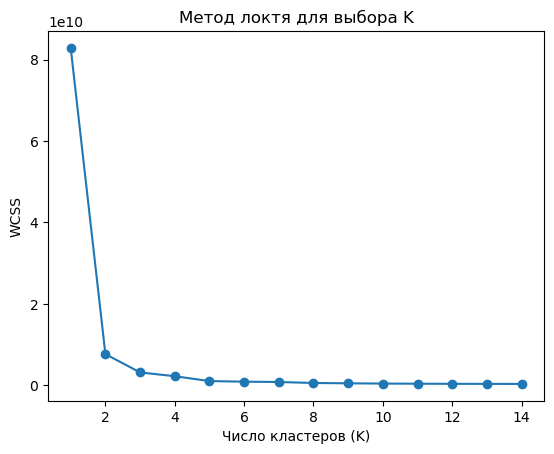

In [59]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Создадим вектор признаков
X = features

# Считаем WCSS для разных K
wcss = []
K_values = range(1, 15)

for k in K_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # inertia_ -- сумма квадратов расстояний точек до центроидов

# Строим график
plt.plot(K_values, wcss, marker='o', linestyle='-')
plt.xlabel("Число кластеров (K)")
plt.ylabel("WCSS")
plt.title("Метод локтя для выбора K")
plt.show()

In [60]:
for i in [3,4,5]:
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(X)
    clusters_kmean = kmeans.predict(X)

    score = silhouette_score(X, clusters_kmean)
    print(f'Score KMeans for K={i}: {score}')

Score KMeans for K=3: 0.7665340187343344
Score KMeans for K=4: 0.6287594223533699
Score KMeans for K=5: 0.6257525034390876


In [61]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

std = StandardScaler()
X_std = std.fit_transform(features)

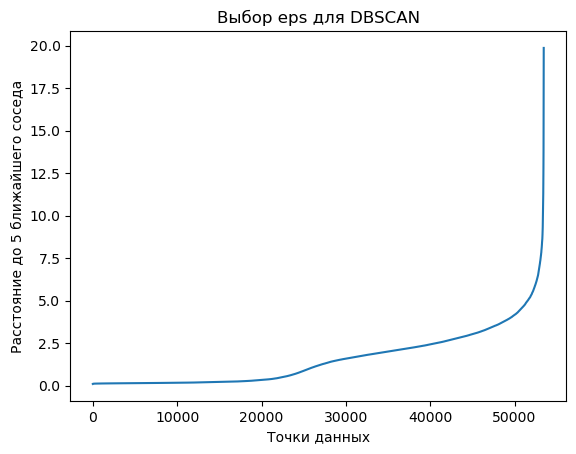

In [62]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

# Ищем расстояния до 5 ближайших соседей
nbrs = NearestNeighbors(n_neighbors=5, n_jobs=10).fit(X_std)
distances, _ = nbrs.kneighbors(X_std)

# Берем 5-е расстояние, сортируем и строим график
distances = np.sort(distances[:, 4])
plt.plot(distances)
plt.xlabel("Точки данных")
plt.ylabel("Расстояние до 5 ближайшего соседа")
plt.title("Выбор eps для DBSCAN")
plt.show()


In [63]:
from sklearn.cluster import DBSCAN

# Запускаем DBSCAN
dbscan = DBSCAN(eps=5, min_samples=5, n_jobs=10)

clusters_dbscan = dbscan.fit_predict(X_std)

In [64]:
score_dbscan = silhouette_score(X_std, clusters_dbscan)
print(f'Score DBSCAN: {score_dbscan}')

Score DBSCAN: 0.078354867907718


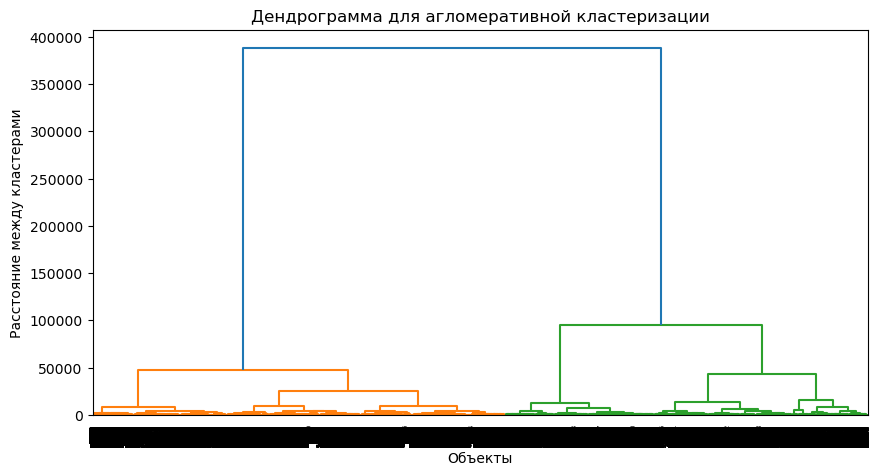

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# Строим матрицу расстояний (linkage matrix)
Z = linkage(X, method="ward")  # Метод Уорда для минимизации дисперсии

# Строим дендрограмму
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title("Дендрограмма для агломеративной кластеризации")
plt.xlabel("Объекты")
plt.ylabel("Расстояние между кластерами")
plt.show()

In [67]:
for i in [3,4,5]:
    agg_clustering = AgglomerativeClustering(n_clusters=i, linkage="ward")

    clusters_agg = agg_clustering.fit_predict(X)

    score = silhouette_score(X, clusters_agg)
    print(f'Score Agg for C={i}: {score}')


Score Agg for C=3: 0.7665340187343344
Score Agg for C=4: 0.6214079562102589
Score Agg for C=5: 0.6174723810824395


In [75]:
X = df_filled.collect().to_pandas().drop(columns=to_drop).drop(columns=['subject_id'])
model = KMeans(n_clusters=4, random_state=42, n_init=10)
clusters = model.fit_predict(X)

df_result = df_filled.collect().to_pandas()
df_result['cluster'] = clusters
df_result['activityID'] = -1
unique_clusters = sorted(df_result['cluster'].unique())
print(unique_clusters)
for new_label, old_label in enumerate(unique_clusters, start=1):
    df_result.loc[df_result['cluster'] == old_label, 'activityID'] = new_label

# Создание файла submission.csv
submission = df_result[['activityID']].reset_index()
submission.columns = ['Index', 'activityID']
submission.to_csv('submission_kmean_1.csv', index=False)

[0, 1, 2, 3]


In [74]:
X.describe()

,timestamp,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handGyro1,handGyro2,handGyro3,handMagne1,handMagne2,...,ankleAcc6_3,ankleGyro1,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,ankleOrientation1,ankleOrientation2,ankleOrientation3
count,534601.000000,534601.000000,534601.000000,534601.000000,534601.000000,534601.000000,534601.000000,534601.000000,534601.000000,534601.000000,...,534601.000000,534601.000000,534601.000000,534601.000000,534601.000000,534601.000000,534601.000000,534601.000000,534601.000000,534601.000000
mean,1593.538159,32.451341,-4.436413,3.243565,4.080092,-0.008848,0.028776,0.000036,20.403611,-10.375186,...,-2.309807,0.017752,-0.031927,0.002307,-28.752115,2.116196,14.726320,0.359981,-0.091075,0.303649
std,1243.906483,1.750354,7.035778,7.199773,3.816974,1.155728,0.923328,1.610317,23.856172,21.969621,...,3.402879,0.957084,0.617366,2.031249,19.265923,22.202729,17.865967,0.300861,0.558135,0.343562
min,37.660000,27.500000,-114.755000,-82.550900,-73.949700,-19.690500,-7.609010,-14.264700,-74.600000,-199.520000,...,-62.272900,-10.093500,-7.701040,-14.019600,-172.865000,-136.951000,-102.716000,0.000003,-0.954848,-0.876838
25%,475.500000,31.312500,-9.065130,0.712260,1.617070,-0.148494,-0.080412,-0.085873,4.969080,-23.540600,...,-3.588690,-0.066380,-0.049070,-0.211924,-39.664500,-10.843100,2.385840,0.145729,-0.674639,0.007182
50%,827.610000,32.875000,-5.389420,3.103020,4.164700,-0.004424,0.004291,-0.004447,22.167000,-12.836900,...,-2.122750,0.007470,-0.004729,0.000451,-26.318400,0.078757,16.571600,0.243557,0.000000,0.323122
75%,2876.990000,33.812500,0.367810,5.539890,6.842660,0.125906,0.091399,0.119091,39.021300,5.803440,...,-0.646894,0.060126,0.048142,0.032264,-14.556400,19.173600,25.914500,0.501023,0.409401,0.592794
max,4007.730000,35.250000,60.912600,155.532000,78.480100,22.960000,11.862600,14.326700,128.824000,93.044800,...,44.231200,12.256000,6.002540,14.482700,41.764800,92.867000,122.521000,1.000000,0.959538,0.920506
